In [18]:
import geopandas as gpd
import pandas as pd




In [19]:
# Load the shapefile (this includes .shp, .shx, .dbf)
def to_csv_conversion(shapefile_path,year):
    gdf = gpd.read_file(shapefile_path)

    # Re-projecting to a UTM zone CRS for Alaska (EPSG:3338 is an Alaska Albers projection)    THE BELOW FEW LINES ARE AN IMPORTANT LINES OF CODE
    gdf = gdf.to_crs(epsg=3338)

    # Filter out small geometries based on area (adjust the threshold as necessary)
    gdf_total = gdf[gdf.geometry.area > 1e8]  # Adjust threshold based on testing
    
    csv_file=f"alaska_precinct_election_results{year}.csv"
    gdf.to_csv(f"alaska_precinct_election_results{year}.csv", index=False)
    return gdf,csv_file

In [20]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
def plot_elections_results(gdf,df,type_of_election,year):
    fig, ax = plt.subplots(figsize=(10, 10))
    #gdf.plot(ax=ax, color='white', edgecolor='black')
    gdf.plot(ax=ax, color='white')
    D=[]
    R=[]
    democratic_won=0
    republic_won=0
    other_won=0
    df_num_columns=df.select_dtypes(exclude='object')
    for i in df_num_columns:
        if i[-4]=='D':
            D.append(i)
        if i[-4]=='R':
            R.append(i)

    for _, precinct in df.iterrows():
        popular_vote = max(precinct[2:-1])
        #print(popular_vote)
        d_max,r_max=-1,-1
        for i in D:
            if d_max<precinct[i]:
                democratic=i
                d_max=precinct[i]
        for i in R:
            if r_max<precinct[i]:
                republic=i
                r_max=precinct[i]
            
        if popular_vote == precinct[democratic] and popular_vote == precinct[republic]:
            republic_won+=1
            democratic_won+=1
            color = 'purple'  
        elif popular_vote == precinct[republic]:
            republic_won+=1
            if precinct[republic]-precinct[democratic]<10:
                color='lightcoral'
            else:
                color = 'red' 
        elif popular_vote == precinct[democratic]:
            democratic_won+=1
            if precinct[democratic]-precinct[republic]<10:
                color='lightblue'
            else:
                color = 'blue'  
        else:
            other_won+=1
            #print(precinct[])
            color = 'green'  
        #gdf['NAME'] = gdf['NAME'].str.strip() 
        #precinct['NAME'] = precinct['NAME'].strip()
        specific_precinct = gdf[gdf.NAME == precinct.NAME]
        specific_precinct.plot(ax=ax, color=color)

    print(F"DEMOCRATIC WON IN {democratic_won} PRECINCTS ")
    print(F"REPUBLIC WON IN {republic_won} PRECINCTS")
    print(F"OTHER WON IN {other_won} PRECINCTS")
    legend_elements = [
        mpatches.Patch(color='red', label='Republican Dominent'),
        mpatches.Patch(color='lightcoral', label='Republican'),
        mpatches.Patch(color='blue', label='Democrat Dominent'),
        mpatches.Patch(color='lightblue', label='Democrat'),
        mpatches.Patch(color='purple', label='Tie (Rep/Dem)'),
        mpatches.Patch(color='green', label='Other')
    ]
    ax.legend(handles=legend_elements, loc='upper right')

    plt.title(f'Precinct Wise {type_of_election} Voting Results {year} Alaska')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    plt.show()


DEMOCRATIC WON IN 94 PRECINCTS 
REPUBLIC WON IN 352 PRECINCTS
OTHER WON IN 0 PRECINCTS


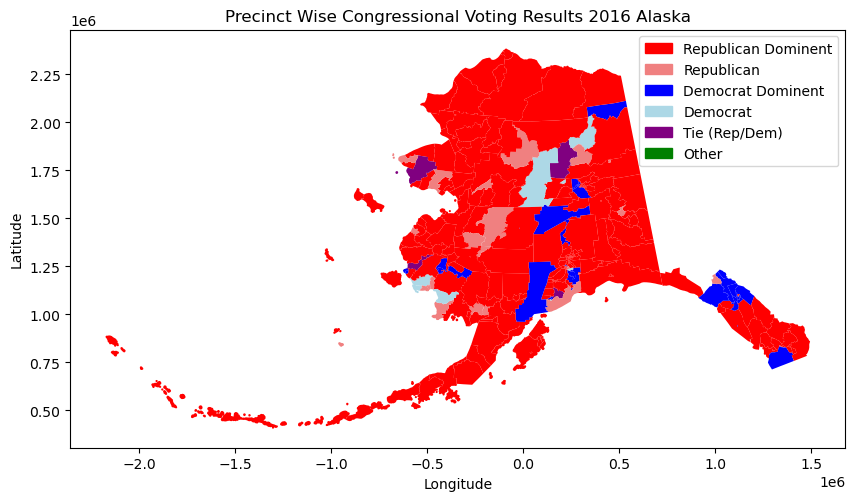

DEMOCRATIC WON IN 2 PRECINCTS 
REPUBLIC WON IN 370 PRECINCTS
OTHER WON IN 69 PRECINCTS


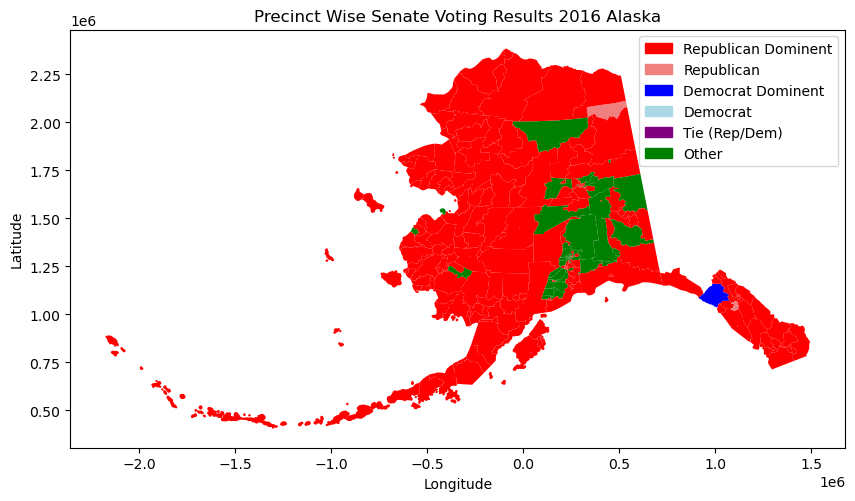

DEMOCRATIC WON IN 207 PRECINCTS 
REPUBLIC WON IN 236 PRECINCTS
OTHER WON IN 0 PRECINCTS


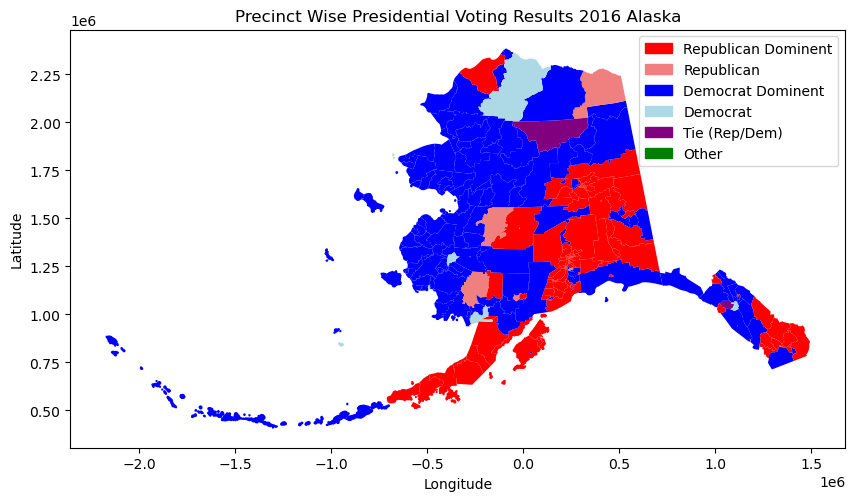

(441, 22)

In [21]:
gdf,csv_file_path=to_csv_conversion('2016/ak_vest_16.shp',2016)
df_2016=pd.read_csv(csv_file_path)
#candidates for congressional elections 2016
'''G16HALRYOU - Don Young (Republican Party)
G16HALDLIN - Steve Lindbeck (Democratic Party)
G16HALLMCD - Jim C. McDermott (Libertarian Party)
G16HALISOU - Bernie Souphanavong (Independent)'''

#####################################HAVEN'T CONSIDERED WRITE-IN VOTES#########################

df_house_2016=df_2016[['DISTRICT','NAME','G16HALRYOU','G16HALDLIN','G16HALLMCD','G16HALISOU','geometry']]


#candidates for Senate elections 2016
'''G16USSRMUR - Lisa Murkowski (Republican Party)
G16USSDMET - Ray Metcalfe (Democratic Party)
G16USSLMIL - Joe Miller (Libertarian Party)
G16USSICRA - Breck A. Craig (Independent)
G16USSIGIA - Ted Gianoutsos (Independent)
G16USSISTO - Margaret Stock (Independent)
G16USSOWRI - Write-in Votes'''

##################################### HAVEN'T CONSIDERED WRITE-IN VOTES #########################

df_senate_2016=df_2016[['DISTRICT','NAME','G16USSRMUR','G16USSDMET','G16USSLMIL','G16USSICRA','G16USSIGIA','G16USSISTO','geometry']]

'''G16PRERTRU - Donald J. Trump (Republican Party)
G16PREDCLI - Hillary Clinton (Democratic Party)
G16PRELJOH - Gary Johnson (Libertarian Party)
G16PREGSTE - Jill Stein (Green Party)
G16PRECCAS - Darrell L. Castle (Constitution Party)
G16PREIFUE - Roque De La Fuente (Independent)
G16PREOWRI - Write-in Votes'''

df_presidential_2016=df_2016[['DISTRICT','NAME','G16PRERTRU','G16PREDCLI','G16PRELJOH','G16PREGSTE','G16PRECCAS','G16PREIFUE','geometry']]

#PLOTTING 2016 RESULTS
plot_elections_results(gdf,df_house_2016,'Congressional','2016')
plot_elections_results(gdf,df_senate_2016,'Senate','2016')
plot_elections_results(gdf,df_presidential_2016,'Presidential','2016')
df_2016.shape


DEMOCRATIC WON IN 198 PRECINCTS 
REPUBLIC WON IN 244 PRECINCTS
OTHER WON IN 0 PRECINCTS


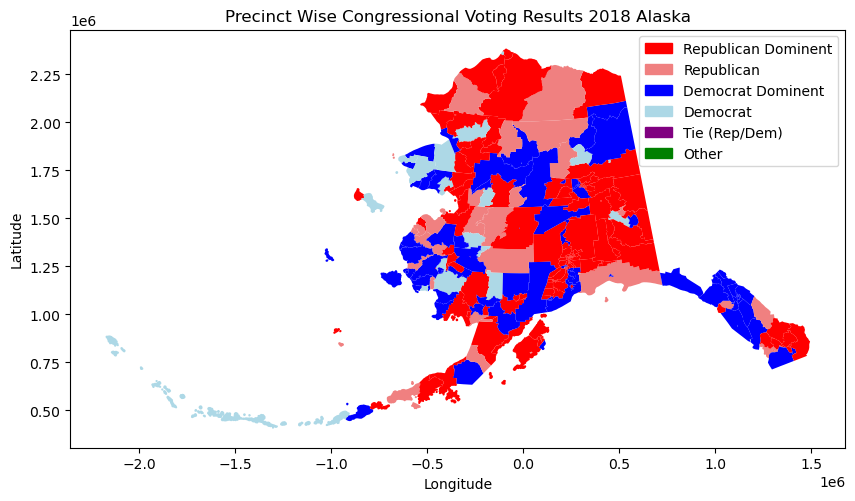

DEMOCRATIC WON IN 254 PRECINCTS 
REPUBLIC WON IN 189 PRECINCTS
OTHER WON IN 0 PRECINCTS


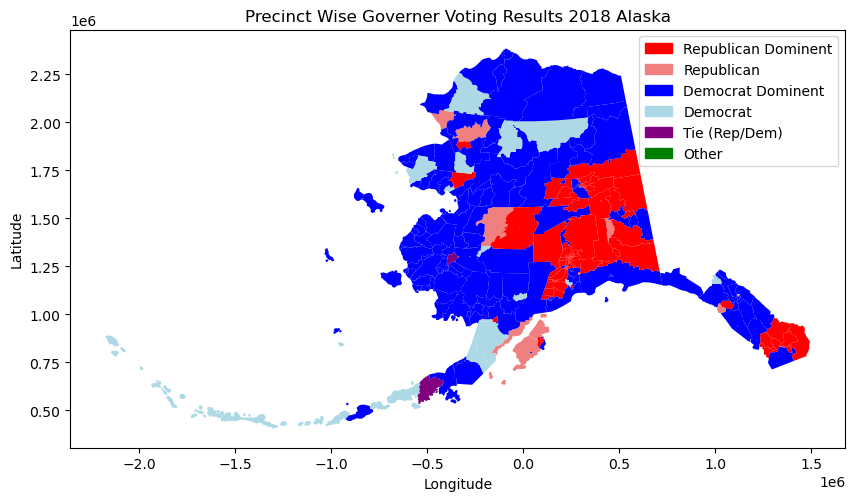

In [22]:
gdf,csv_file_path=to_csv_conversion('2018/ak_vest_18.shp',2018)
df_2018=pd.read_csv(csv_file_path)

#candidates for congressional elections 2018
'''G18HALRYOU - Don Young (Republican Party)
G18HALDGAL - Alyse S. Galvin (Democratic Party)'''

#####################################HAVEN'T CONSIDERED WRITE-IN VOTES#########################

df_house_2018=df_2018[['DISTRICT','NAME','G18HALRYOU','G18HALDGAL','geometry']]


#candidates for Senate elections 2018
'''G18GOVRDUN - Mike Dunleavy (Republican Party)
G18GOVDBEG - Mark Begich (Democratic Party)
G18GOVLTOI - William Toien (Libertarian Party)
G16USSOWRI - Write-in Votes'''

##################################### HAVEN'T CONSIDERED WRITE-IN VOTES #########################

df_governer_2018=df_2018[['DISTRICT','NAME','G18GOVRDUN','G18GOVDBEG','G18GOVLTOI','geometry']]

#PLOTTING 2018 RESULTS
plot_elections_results(gdf,df_house_2018,'Congressional','2018')
plot_elections_results(gdf,df_governer_2018,'Governer','2018')



DEMOCRATIC WON IN 213 PRECINCTS 
REPUBLIC WON IN 232 PRECINCTS
OTHER WON IN 0 PRECINCTS


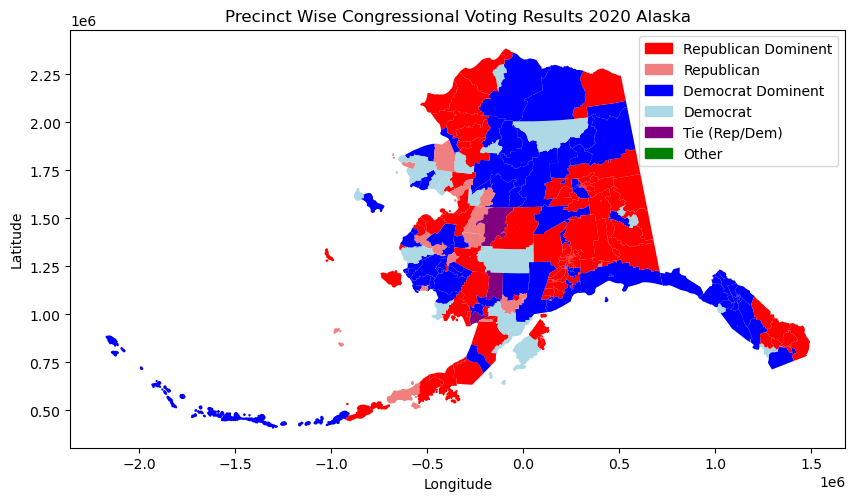

DEMOCRATIC WON IN 206 PRECINCTS 
REPUBLIC WON IN 238 PRECINCTS
OTHER WON IN 0 PRECINCTS


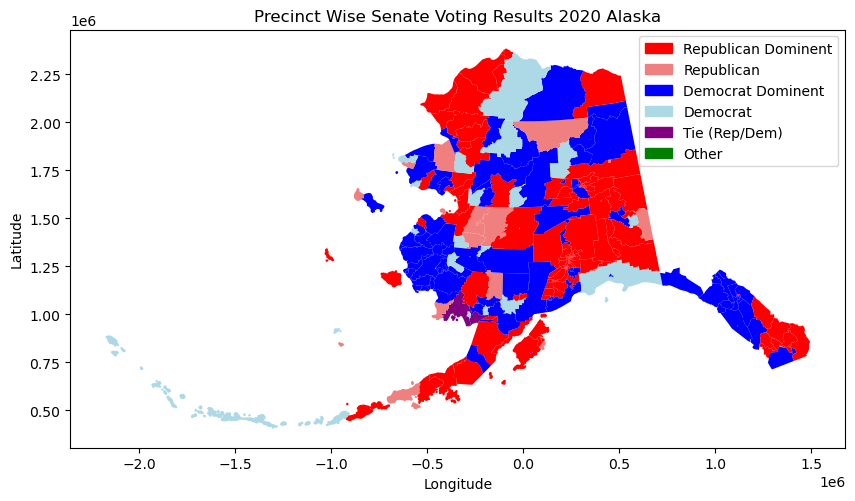

DEMOCRATIC WON IN 234 PRECINCTS 
REPUBLIC WON IN 210 PRECINCTS
OTHER WON IN 0 PRECINCTS


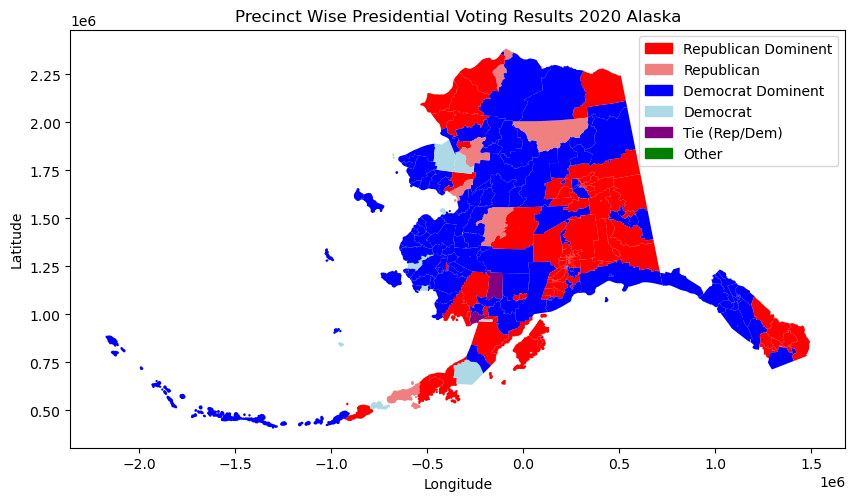

In [23]:
gdf,csv_file_path=to_csv_conversion('2020/ak_vest_20.shp',2020)
df_2020=pd.read_csv(csv_file_path)

#candidates for congressional elections 2020
'''G20HALRYOU - Don Young (Republican Party)
G20HALDGAL - Alyse S. Galvin (Democratic Party)'''

##################################### HAVEN'T CONSIDERED WRITE-IN VOTES #########################

df_house_2020=df_2020[['DISTRICT','NAME','G20HALRYOU','G20HALDGAL','geometry']]


#candidates for Senate elections 2020
'''G20USSRSUL - Dan Sullivan (Republican Party)
G20USSDGRO - Al Gross (Democratic Party)
G20USSOHOW - John Wayne Howe (Alaskan Independence Party)'''

#####################################HAVEN'T CONSIDERED WRITE-IN VOTES#########################

df_Senate_2020=df_2020[['DISTRICT','NAME','G20USSRSUL','G20USSDGRO','G20USSOHOW','geometry']]

'''G20PRERTRU - Donald J. Trump (Republican Party)
G20PREDBID - Joseph R. Biden (Democratic Party)
G20PRELJOR - Jo Jorgensen (Libertarian Party)
G20PREGJAN - James G. "Jesse Ventura" Janos (Green Party)
G20PRECBLA - Don Blankenship (Conservative Party)
G20PREIPIE - Brock Pierce (Independent)
G20PREOFUE - Rocque "Rocky" De La Fuente (Alliance Party)'''

df_presidential_2020=df_2020[['DISTRICT','NAME','G20PRERTRU','G20PREDBID','G20PRELJOR','G20PREGJAN','G20PRECBLA','G20PREIPIE','G20PREOFUE','geometry']]


#PLOTTING 2020 RESULTS
plot_elections_results(gdf,df_house_2020,'Congressional','2020')
plot_elections_results(gdf,df_Senate_2020,'Senate','2020')
plot_elections_results(gdf,df_presidential_2020,'Presidential','2020')



In [24]:

gdf,csv_file_path=to_csv_conversion('2022/ak_gen_2022_prec.shp',2022)
df_2022=pd.read_csv(csv_file_path)
print(df_2022.shape)
df_2022=df_2022.drop(['SLDL_DIST','SLDU_DIST'],axis='columns')
df_2022.rename(columns={'PRECINCT':'NAME'},inplace=True)
df_2022.head()
print(df_2022.shape)
gdf=gdf.rename(columns={'PRECINCT':'NAME'})
#print(gdf)




(401, 257)
(401, 255)


DEMOCRATIC WON IN 319 PRECINCTS 
REPUBLIC WON IN 82 PRECINCTS
OTHER WON IN 0 PRECINCTS


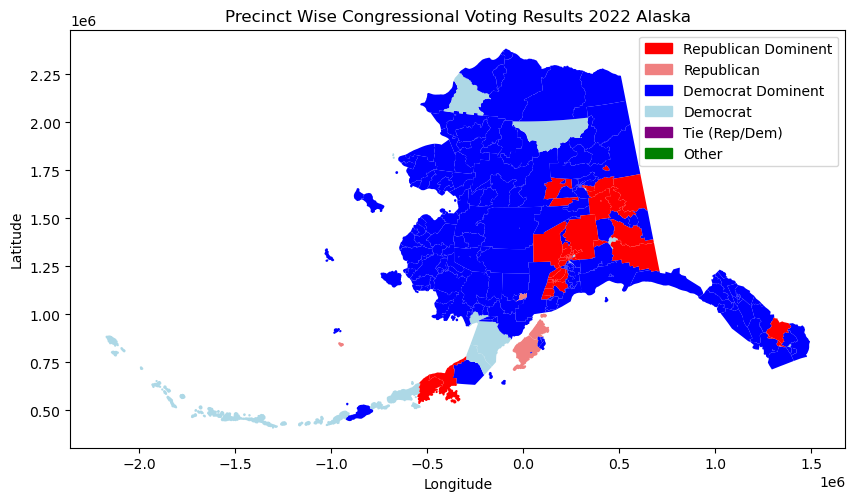

DEMOCRATIC WON IN 0 PRECINCTS 
REPUBLIC WON IN 401 PRECINCTS
OTHER WON IN 0 PRECINCTS


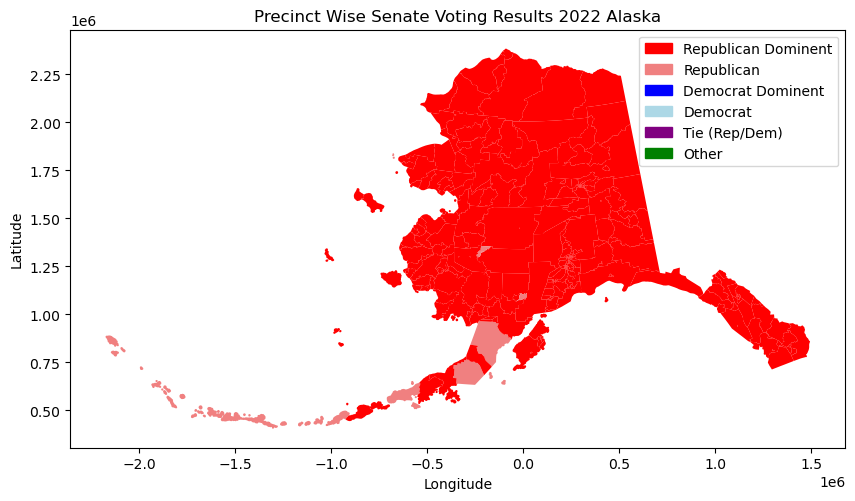

In [25]:

#candidates for congressional elections 2022
'''G22CONDPEL Peltola, Mary S. - DEM                                       
G22CONLBYE Bye, Chris - LIB                                             
G22CONOWRI Write-in                                                     
G22CONRBEG Begich, Nick - REP                                           
G22CONRPAL Palin, Sarah - REP'''

##################################### HAVEN'T CONSIDERED WRITE-IN VOTES #########################

df_house_2022=df_2022[['NAME','UNIQUE_ID','G22CONDPEL','G22CONLBYE','G22CONRBEG','G22CONRPAL','geometry']]


#candidates for Senate elections 2022
'''G22USSDCHE Chesbro, Patricia R. - DEM                                   
G22USSOWRI Write-in                                                     
G22USSRKEL Kelley, Buzz A. - REP                                        
G22USSRMUR Murkowski, Lisa - REP                                        
G22USSRTSH Tshibaka, Kelly C. - REP '''

#####################################HAVEN'T CONSIDERED WRITE-IN VOTES#########################

df_Senate_2022=df_2022[['NAME','UNIQUE_ID','G22USSDCHE','G22USSRKEL','G22USSRMUR','G22USSRTSH','geometry']]

#PLOTTING 2020 RESULTS
plot_elections_results(gdf,df_house_2022,'Congressional','2022')
plot_elections_results(gdf,df_Senate_2022,'Senate','2022')


In [26]:
def plot_elections_results_2022_senate_(gdf,df,type_of_election,year):
    fig, ax = plt.subplots(figsize=(10, 10))
    #gdf.plot(ax=ax, color='white', edgecolor='black')
    gdf.plot(ax=ax, color='white')
    D=[]
    R=[]
    df_num_columns=df.select_dtypes(exclude='object')
    #df_Senate_2022=df_2022[['NAME','UNIQUE_ID','G22USSDCHE','G22USSRKEL','G22USSRMUR','G22USSRTSH','geometry']]

    for _, precinct in df.iterrows():
        popular_vote = max(precinct[2:-1])
        #print(popular_vote)
            
        if (popular_vote == precinct['G22USSDCHE'] and popular_vote == precinct['G22USSRKEL']) or (popular_vote == precinct['G22USSDCHE'] and popular_vote == precinct['G22USSRMUR']) or (popular_vote == precinct['G22USSDCHE'] and popular_vote == precinct['G22USSRTSH']):
            color = 'purple'  
        elif popular_vote == precinct['G22USSRKEL']:
            color = 'red' 
        elif popular_vote == precinct['G22USSRMUR']:
            color = '#8B0000' 
        elif popular_vote == precinct['G22USSRTSH']:
            color = '#CD5C5C' 
        elif popular_vote == precinct['G22USSDCHE']:
            #print(popular_vote)
            color = 'blue'  
        else:
            #print(precinct[])
            color = 'green'  
        #gdf['NAME'] = gdf['NAME'].str.strip() 
        #precinct['NAME'] = precinct['NAME'].strip()
        specific_precinct = gdf[gdf.NAME == precinct.NAME]
        specific_precinct.plot(ax=ax, color=color)

    legend_elements = [
        mpatches.Patch(color='red', label='Kelley (REP) '),
        mpatches.Patch(color='#8B0000', label='Murkowski (REP)'),
        mpatches.Patch(color='#CD5C5C', label='Tshibaka (REP)'),
        mpatches.Patch(color='blue', label='Democrat'),
        mpatches.Patch(color='purple', label='Tie (Rep/Dem)'),
        mpatches.Patch(color='green', label='Other')
    ]
    ax.legend(handles=legend_elements, loc='upper right')

    plt.title(f'Precinct Wise {type_of_election} Voting Results {year} Alaska')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    plt.show()


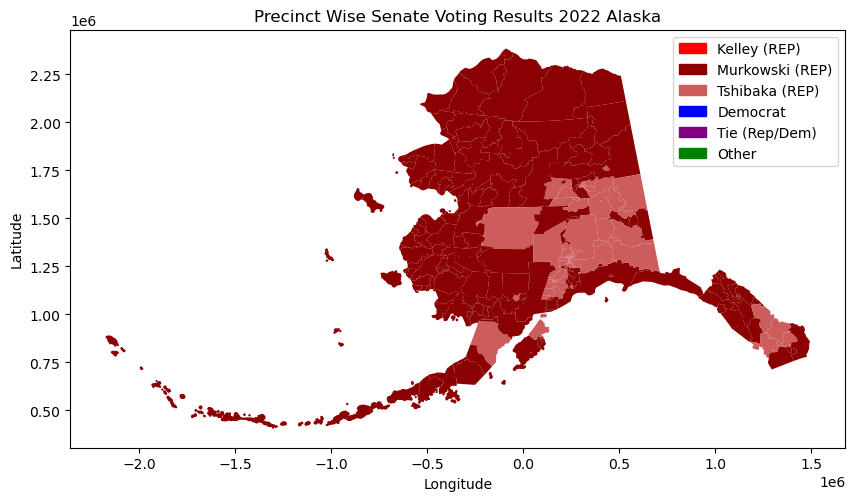

In [27]:
#SENATE ELECTION STATISTICS 2022 FOR INDIVIDUALS 
df_Senate_2022=df_2022[['NAME','UNIQUE_ID','G22USSDCHE','G22USSRKEL','G22USSRMUR','G22USSRTSH','geometry']]
plot_elections_results_2022_senate_(gdf,df_Senate_2022,'Senate','2022')

In [28]:
print(len(df_Senate_2022[df_Senate_2022.G22USSDCHE<df_Senate_2022.G22USSRMUR]))
print(len(df_Senate_2022[df_Senate_2022.G22USSDCHE<df_Senate_2022.G22USSRKEL]))
print(len(df_Senate_2022[df_Senate_2022.G22USSDCHE<df_Senate_2022.G22USSRTSH]))

401
35
346


In [29]:
df_house_2022

,NAME,UNIQUE_ID,G22CONDPEL,G22CONLBYE,G22CONRBEG,G22CONRPAL,geometry
0,08-035 Bear Creek,08-035 Bear Creek,461,15,224,259,"POLYGON ((255109.452547763 1154712.583725222, ..."
1,08-045 Funny River No. 1,08-045 Funny River No. 1,166,10,158,241,MULTIPOLYGON (((182953.96091775235 1172432.183...
2,08-060 Mackey Lake,08-060 Mackey Lake,274,16,315,383,POLYGON ((160791.40645581216 1178387.940796654...
3,08-065 Moose Pass,08-065 Moose Pass,122,1,33,57,POLYGON ((237481.9625428596 1203111.8590286903...
4,05-865 Seward-Lowell Point,05-865 Seward-Lowell Point,478,8,154,202,"POLYGON ((287297.8729733197 1170946.617566528,..."
...,...,...,...,...,...,...,...
396,29-540 Valdez No. 2,29-540 Valdez No. 2,173,7,76,114,POLYGON ((411631.3539545562 1264163.0458698869...
397,30-570 East Schrock,30-570 East Schrock,38,3,39,64,"POLYGON ((242825.875837523 1312297.8193517341,..."
398,26-370 Knik Goose Bay No. 3,26-370 Knik Goose Bay No. 3,143,4,176,307,POLYGON ((233886.25108304966 1293953.040795516...
399,30-560 Cantwell,30-560 Cantwell,80,4,22,34,POLYGON ((257127.45908027017 1509912.998682182...


In [30]:
df_house_2022_cut=df_house_2022.drop(['UNIQUE_ID','geometry'],axis=1)
df_house_2022_cut.columns

Index(['NAME', 'G22CONDPEL', 'G22CONLBYE', 'G22CONRBEG', 'G22CONRPAL'], dtype='object')

In [31]:
# Assuming your data is in a column named 'Location'
df_house_2022_cut['NAME'] = df_house_2022_cut['NAME'].str.extract(r'(\d{2}-\d{3})')
df_house_2022_cut


,NAME,G22CONDPEL,G22CONLBYE,G22CONRBEG,G22CONRPAL
0,08-035,461,15,224,259
1,08-045,166,10,158,241
2,08-060,274,16,315,383
3,08-065,122,1,33,57
4,05-865,478,8,154,202
...,...,...,...,...,...
396,29-540,173,7,76,114
397,30-570,38,3,39,64
398,26-370,143,4,176,307
399,30-560,80,4,22,34


In [32]:
df_house_2022_cut=df_house_2022_cut.rename({'G22CONDPEL':'Democratic','G22CONLBYE':'Liberation','G22CONRBEG':'Republic1','G22CONRPAL':'Republic2'},axis=1)

In [33]:
df_house_2022_cut['Republic']=df_house_2022_cut['Republic1']+df_house_2022_cut['Republic2']
df_house_2022_cut=df_house_2022_cut.drop(['Republic1','Republic2'],axis=1)

In [34]:
df_house_2022_cut.to_csv('df_2022_house_required.csv',index=False)
df_house_2022_cut

,NAME,Democratic,Liberation,Republic
0,08-035,461,15,483
1,08-045,166,10,399
2,08-060,274,16,698
3,08-065,122,1,90
4,05-865,478,8,356
...,...,...,...,...
396,29-540,173,7,190
397,30-570,38,3,103
398,26-370,143,4,483
399,30-560,80,4,56
